In [93]:
# Import all the libraries

from keras.datasets import mnist
from keras.utils import np_utils

!pip install -q -U tensorflow >= 1.8.0

import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the fashion-mnist pre-shuffled train data and test data

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape, "y_test shape:", y_test.shape)

# One hot encode target values
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

  ERROR: Could not find a version that satisfies the requirement 1.8.0 (from versions: none)
ERROR: No matching distribution found for 1.8.0
x_train shape: (60000, 28, 28) y_train shape: (60000,)
x_test shape: (10000, 28, 28) y_test shape: (10000,)


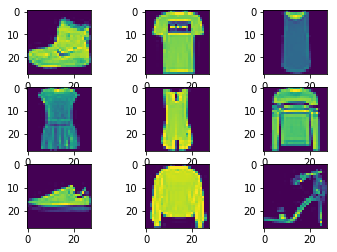

In [94]:
# Plot first few images

for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(x_train[i])
  
# Show the figure
plt.show()

In [0]:
# Fix random seed for reproducibility

np.random.seed(7)

In [96]:
# Create a random holdout sample of 20% validation and 80% training

train_pct_index = int(0.8 * len(x_train))
x_train, x_val = x_train[:train_pct_index], x_train[train_pct_index:]
y_train, y_val = y_train[:train_pct_index], y_train[train_pct_index:]

print("x_train shape:", x_train.shape, "x_val shape:", x_val.shape)


x_train shape: (48000, 28, 28) x_val shape: (12000, 28, 28)


In [97]:
# MODEL 1: Fit a baseline model - a Multilayer Perceptron

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

np.random.seed(7)

# Flatten 28*28 images to a 784 vector for each image
num_pixels = x_train.shape[1] * x_train.shape[2]
x_train = x_train.reshape(x_train.shape[0], num_pixels).astype('float32')
x_val = x_val.reshape(x_val.shape[0], num_pixels).astype('float32')
x_test = x_test.reshape(x_test.shape[0], num_pixels).astype('float32')

# Normalize inputs from 0-255 to 0-1
x_train = x_train / 255
x_val = x_val / 255
x_test = x_test / 255

# Define baseline model
def baseline_nn_model():
  model = Sequential()
  model.add(Dense(num_pixels, input_dim=num_pixels, init='normal', activation='relu'))  #input layer
  model.add(Dense(100, activation='relu'))  #1
  model.add(Dense(100, activation='relu'))  #2
  model.add(Dense(100, activation='relu'))  #3
  model.add(Dense(100, activation='relu'))  #4
  model.add(Dense(num_classes, init='normal', activation='softmax'))                    #output layer
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

model1 = baseline_nn_model()

model1.fit(x_train, y_train, validation_data=(x_val, y_val), epochs = 15, batch_size=200, verbose=0)

scores = model1.evaluate(x_val, y_val, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(784, input_dim=784, activation="relu", kernel_initializer="normal")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(10, activation="softmax", kernel_initializer="normal")`


Baseline Error: 10.93%


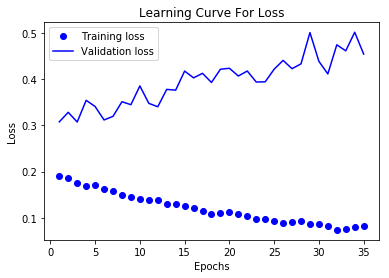

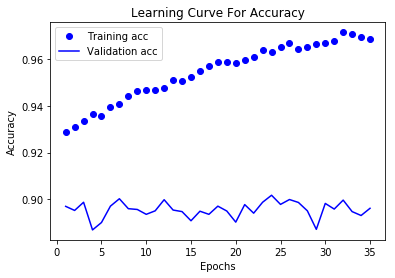

In [98]:
# Evaluate ideal number of epoch

history = model1.fit(x_train,
                    y_train,
                    epochs=35,
                    batch_size=200,
                    validation_data=(x_val, y_val), 
                    verbose = 0)

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Learning Curve For Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Accuracy curve
plt.clf()   # clear figure

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Learning Curve For Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [99]:
# Refit model to ideal number of epochs

model1.fit(x_train, y_train, validation_data=(x_val, y_val), epochs = 23, batch_size=200, verbose=0)

scores = model1.evaluate(x_val, y_val, verbose=0)
print("Baseline NN Error: %.2f%%" % (100-scores[1]*100))


Baseline NN Error: 10.39%


In [100]:
# Run the Neural Network model with test dataset

model1.fit(x_train, y_train, validation_data=(x_test, y_test), epochs = 23, batch_size=200, verbose=0)

scores = model1.evaluate(x_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Baseline Error: 10.57%


# We saw the model is overfitted after 23 epochs and so we chose 23 as the optimal value and we reran the model with this value and the error reduced to 10.39% from 10.93%. We chose 23 epochs because of the following-

# Loss curve- The loss increase after 23 epochs
# Accuracy Curve- the accuracy starts decreasing after 23 epochs

In [101]:
#To find table of predicted values

y_val_pred = model1.predict(x_val)

a = np.argmax(y_val_pred, axis=1)
b = np.argmax(y_val, axis=1)
df_pred = pd.DataFrame(a, columns = ['Predicted'])
df_act = pd.DataFrame(b, columns = ["Actual"])
table = pd.concat([df_pred, df_act], axis = 1)
table

,Predicted,Actual
0,5,5
1,7,7
2,0,0
3,6,6
4,8,8
5,7,7
6,7,7
7,3,4
8,8,8
9,6,2


In [102]:
#Baseline CNN model 

from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

np.random.seed(7)

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_val = x_val.reshape(x_val.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

x_train = x_train.astype('float32')
x_val = x_val.astype('float32')
x_test = x_test.astype('float32')

input_shape = (28,28,1)

model3 = Sequential()
model3.add(Conv2D(32, kernel_size=(3,3), input_shape=input_shape, activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Conv2D(64, kernel_size=(3,3),input_shape=input_shape, activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Flatten()) 
model3.add(Dense(400, activation=tf.nn.relu))
model3.add(Dropout(0.4))
model3.add(Dense(10,activation=tf.nn.softmax))

model3.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

model3.fit(x_train, y_train, validation_data=(x_val, y_val), epochs = 10, batch_size=200, verbose=0)

scores = model3.evaluate(x_val, y_val, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))


Baseline Error: 9.03%


In [103]:
#Baseline CNN model with ZCA whitening pre-processing

from keras.preprocessing.image import ImageDataGenerator

np.random.seed(7)

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_val = x_val.reshape(x_val.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

x_train = x_train.astype('float32')
x_val = x_val.astype('float32')
x_test = x_test.astype('float32')

datagen = ImageDataGenerator(zca_whitening=True) 
datagen.fit(x_train)

input_shape = (28,28,1)

model3 = Sequential()
model3.add(Conv2D(32, kernel_size=(3,3), input_shape=input_shape, activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Conv2D(64, kernel_size=(3,3),input_shape=input_shape, activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Flatten()) 
model3.add(Dense(400, activation=tf.nn.relu))
model3.add(Dropout(0.4))
model3.add(Dense(10,activation=tf.nn.softmax))

model3.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

model3.summary()

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:336: UserWarning: This ImageDataGenerator specifies `zca_whitening`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_53 (Dense)             (None, 400)               640400    
_________________________________________________________________
dropout_6 (Dropout)          (None, 400)             

# We have used a differnet model topology than what was mentioned in the book. We have taken the kernel size as 3*3 for 32 output layers and we have set 64 output layers for second ConV2D layer.We evaluated dense layer with 400 units and dropout of 40%. 

In [104]:
model3.fit(x_train, y_train, validation_data=(x_val, y_val), epochs = 10, batch_size=200, verbose=0)

scores = model3.evaluate(x_val, y_val, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))


Baseline Error: 8.93%


In [105]:
# Run the CNN model with test dataset

model3.fit(x_train, y_train, validation_data=(x_test, y_test), epochs = 10, batch_size=200, verbose=0)

scores = model3.evaluate(x_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))


Baseline Error: 8.23%


# Write-up
# We ran the baseline nueral network model with initial epochs- 15 and the baseline error was 10.93%. After we finalized the optimal epoch which came out to be 23, because post this the accuracy started decreasing and the loss increased.Then we ran the model with epoch - 23, the baseline error reduced to 10.39%. Running the model on the test dataset(new data) the error came out to be 10.57%. This baseline error is quite close to the validation error, so the model is performing well. Model did not improve from training to test dataset.

# We ran the baseline CNN model with epochs- 10, batch size -200 and ZCA whitening as the pre-processing technique and the error obtained was 8.93%. Then we fit the model on the test data(new data) and the error was 8.23%. Since the error for both validation and test is comparable so this seems to be a good model. Model did improve from training to test dataset.

# CNN with ZCA whitening is better than the nueral network(model 1) as the accuracy obtained is higher with less error. 